In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import TweetTokenizer
from helpers import preprocessing_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
raw_training_data = pd.read_csv("data/train.csv")


,tweets,class
21238,fav moment in sepp blatter vid ( 0:20 ) : `` w...,1
21239,just found this while walking my human ....,1
21240,'disrespected the wife of prophet ' - pseudo l...,1
21241,do you know that super yeay satisfying feeling...,1
21242,if you 're going to call someone ignorant and ...,1


In [58]:
raw_training_data['class'].value_counts()

figurative    21238
irony         20894
sarcasm       20681
regular       18595
Name: class, dtype: int64

In [51]:
training_data = preprocessing_pipeline(raw_training_data)
training_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [57]:
training_data['class'].value_counts()

1    41555
0    18569
Name: class, dtype: int64

In [4]:
tweet_tokenizer = TweetTokenizer()
def tokenize(tweet):
    return tweet_tokenizer.tokenize(tweet)
vectorizer = CountVectorizer(tokenizer=tokenize)
training_matrix = vectorizer.fit_transform(training_data["tweets"])

In [5]:
X = training_matrix
y = training_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

      0      1
0  3916   2427
1  1601  10094


/Users/haim/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


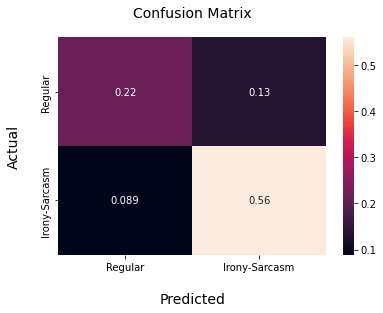

In [44]:
model = LinearSVC(C=0.5,
                class_weight="balanced",
                random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cf_matrix = pd.DataFrame(confusion_matrix(y_pred, y_test))
cf_matrix = cf_matrix.to_numpy()/np.sum(cf_matrix.to_numpy())

ax = sns.heatmap(cf_matrix, annot=True)

ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Regular', 'Irony-Sarcasm'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Regular', 'Irony-Sarcasm'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

pd.DataFrame(classification_report(y_pred, y_test, output_dict=True)).to_csv("output_svm.csv")


/Users/haim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


      0      1
0  3364   1205
1  2153  11316


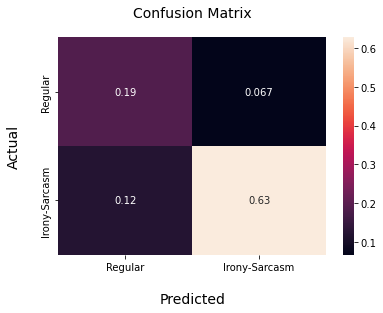

In [45]:
model = LogisticRegression(class_weight=None,
                            max_iter=100,
                            n_jobs=7,
                            random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cf_matrix = pd.DataFrame(confusion_matrix(y_pred, y_test))
cf_matrix = cf_matrix.to_numpy()/np.sum(cf_matrix.to_numpy())

ax = sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Regular', 'Irony-Sarcasm'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Regular', 'Irony-Sarcasm'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

pd.DataFrame(classification_report(y_pred, y_test, output_dict=True)).to_csv("output_lr.csv")

      0      1
0  3710   1755
1  1807  10766


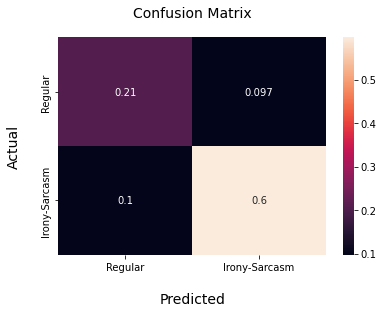

In [46]:
model = RandomForestClassifier(class_weight="balanced",
                               min_samples_leaf=3,
                               n_estimators=110,
                               n_jobs=7,
                               random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cf_matrix = pd.DataFrame(confusion_matrix(y_pred, y_test))
cf_matrix = cf_matrix.to_numpy()/np.sum(cf_matrix.to_numpy())

ax = sns.heatmap(cf_matrix, annot=True)
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Regular', 'Irony-Sarcasm'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Regular', 'Irony-Sarcasm'])
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

pd.DataFrame(classification_report(y_pred, y_test, output_dict=True)).to_csv("output_rf.csv")